In [60]:
# This notebook contain my solution to Titanic: Machine Learning from Disaster (Kaggle 'starter' competition)
# Data can be found here: https://www.kaggle.com/c/titanic/data
# I know that my work may be quite far from ideal, as I am rather a beginner - but if you decide to actually read/analyse it
# then I hope that it will be somehow useful.
# Ok, let's say 'Hello World' to Kaggle :D

# First, libraries import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [61]:
#Time to load data...
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

In [62]:
#... and preview it
sns.set_style('whitegrid')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [64]:
# we can see that some columns have missing values - that needs to be dealt with, some columns clearly
# do not affect chances of survival - ticket number for example.
# PassangerId is probably index from database and can be dropped too.
# Cabin number is another candidate to drop - not only because its usabilty but also high number of 
#missing values, which is 687 out of 891, ~77%.
# Embarked misses some values too and port of embarkation does not seem to be useful in prediction
# but that will be investigated first.
# Name will be dropped aswell (although first it might be useful in dealing with Age missing values).

In [65]:
train_data_cleared = train_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [66]:
# Embarked has only two missing values - such low amount can be replaced by the most frequent one
embarked_counts = train_data_cleared.groupby("Embarked").size()
print(embarked_counts)

Embarked
C    168
Q     77
S    644
dtype: int64


In [67]:
# result was Southampton
train_data_cleared["Embarked"].fillna('S')

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

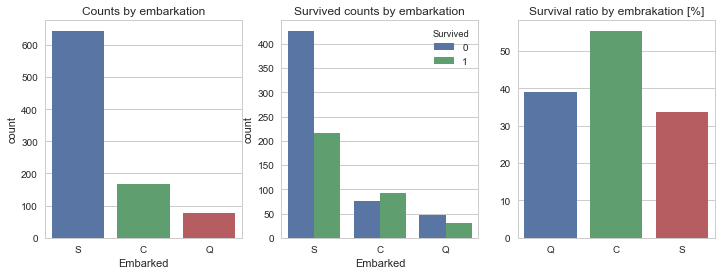

In [68]:
# Now we can do some visualization and see how embarkation port affects chances of survival
fig = plt.figure(figsize=(12, 4))

#titles = ['Counts', 'Survived counts', 'Survived [%]']
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Counts by embarkation")
#ax1.bar(embarked_counts.keys(), embarked_counts.values())
#well, line above is not good idea and it tourns out seaborn can hande that so why not use it
sns.countplot(x='Embarked', data=train_data_cleared, ax=ax1)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Survived counts by embarkation')
sns.countplot(x='Embarked', hue='Survived', data=train_data_cleared, ax=ax2)
# at this subplot we can see that people who embarked at Cherbourg survived more frequently than others

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Survival ratio by embrakation [%]')

embarkation_ports_survival_ratio = {'S':0, 'C':0, 'Q':0}
for port in embarkation_ports_survival_ratio.keys():
    total_count = train_data_cleared[train_data_cleared["Embarked"] == port].size
    survived_count = train_data_cleared[(train_data_cleared["Embarked"] == port) & 
                                       (train_data_cleared["Survived"] == 1)].size
    embarkation_ports_survival_ratio[port] = survived_count / total_count

#print(embarkation_ports_survival_ratio)
#embarkation_survival_ratio_df = pd.DataFrame.from_dict(embarkation_ports_survival_ratio, orient='index')
#print(embarkation_survival_ratio_df.head())
tmp = [[value, key] for key, value in embarkation_ports_survival_ratio.items()]
sns.barplot(x=[key for key in embarkation_ports_survival_ratio.keys()],
            y=[value * 100 for value in embarkation_ports_survival_ratio.values()], ax=ax3)
   
plt.show()

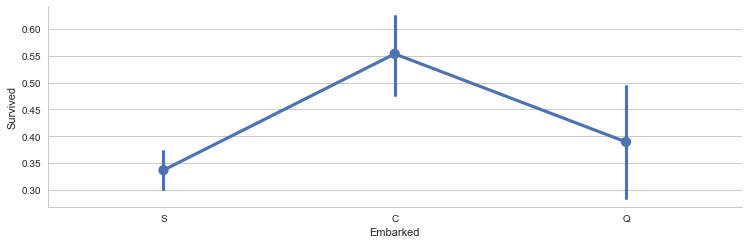

In [69]:
#To sum up - mean of survival by class:
sns.factorplot('Embarked', 'Survived', data=train_data_cleared, size=3.5, aspect=3)

In [70]:
# Looks like embarkation category may affects survival ratio and therefore won't be discarded
# Next thing to analyse is passenger class and fare he paid.
# It is almost sure that passengers from higher class will have better chances of survival - 
# the question that comes to my mind is if among class the ones that paid more were prioritized to
# rescue even in comparision to rest in the same class?
# (if so, it may be that it occurs only in 1st. class)

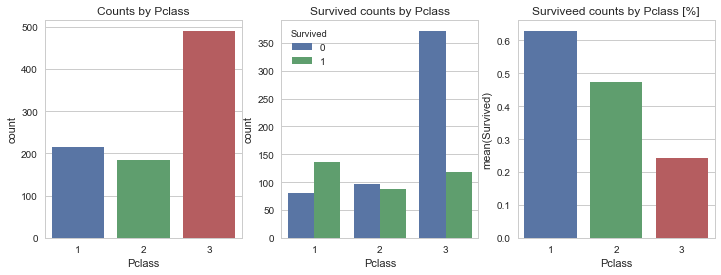

In [71]:
# checking survival rate by pclass is similar to embarkation but code has some improvements
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.set_title('Counts by Pclass')
sns.countplot(x="Pclass", data=train_data_cleared, ax=ax1)

ax2.set_title('Survived counts by Pclass')
sns.countplot(x="Pclass", hue='Survived', data=train_data_cleared, ax=ax2)

ax3.set_title('Surviveed counts by Pclass [%]')
pclasses_percentage = train_data_cleared[['Pclass', 'Survived']].groupby(
    'Pclass', as_index=False).mean()
# due to [0,1] values in survived mean is simply percentage of
# of survived   
sns.barplot(x="Pclass", y='Survived', data=pclasses_percentage, ax=ax3)

In [72]:
# results are rather not surprising - the higher passenger class the higher survival rate
# survival rate in first class in 1st. class i similar to the one of passengers embarked in Southampton
# - checked out of curiosity if the reason was that most of 1st. passengers embarked there but
# it is not the case according to data on wikipedia

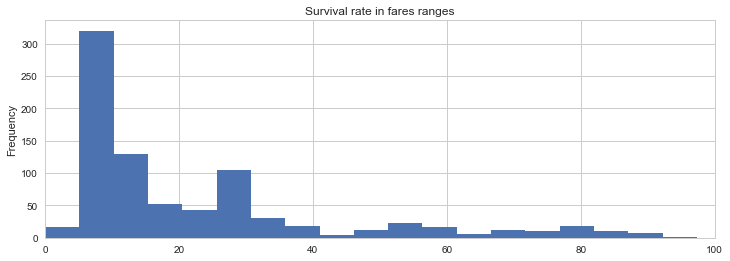

In [73]:
# Moving on to analyse fares
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('Survival rate in fares ranges')

#sns.distplot(train_data_cleared['Fare'] / 10, bins=100, kde=False) - results quite unclear to read
# from commented out try we know that there are passengers that paid more than 100$ but that 
# amount is pretty low and make histogram hard to read so limit will be set
train_data_cleared["Fare"].plot(kind='hist', bins=100, xlim=(0, 100))

In [74]:
#but how the fare corresponds to survivability?
#plt.scatter(train_data_cleared["Fare"], train_data_cleared["Survived"]) well, not relly ^^
#bins = np.arange(1, 102, 5)
#tmp_df = train_data_cleared[train_data_cleared['Fare'].astype(int) <= 100]
#binned = pd.cut(tmp_df['Fare'].astype(int), bins, labels=['Fare'])
#some o fail aproaches above
tmp_df = train_data_cleared[train_data_cleared['Fare'].astype(int) <= 100]
tmp_df["fare_bin"] = pd.cut(tmp_df['Fare'], bins=20)
tmp_df.groupby('fare_bin')['Survived'].mean()

# from the result we can read that survival rate varies but people with lowest/highest fares have 
# respectively lower/higher survival rates


C:\Users\ja\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


fare_bin
(-0.0935, 4.675]    0.062500
(4.675, 9.35]       0.205298
(9.35, 14.025]      0.403361
(14.025, 18.7]      0.338462
(18.7, 23.375]      0.581395
(23.375, 28.05]     0.425532
(28.05, 32.725]     0.441860
(32.725, 37.4]      0.368421
(37.4, 42.075]      0.388889
(42.075, 46.75]     0.000000
(46.75, 51.425]     0.166667
(51.425, 56.1]      0.652174
(56.1, 60.775]      0.857143
(60.775, 65.45]     0.500000
(65.45, 70.125]     0.272727
(70.125, 74.8]      0.250000
(74.8, 79.475]      0.722222
(79.475, 84.15]     0.769231
(84.15, 88.825]     1.000000
(88.825, 93.5]      0.900000
Name: Survived, dtype: float64

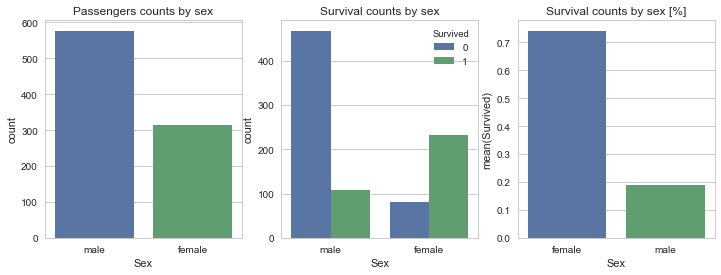

In [75]:
# Now let's see how survival rate is distributed among sexes 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.set_title('Passengers counts by sex')
sns.countplot(train_data_cleared['Sex'], data=train_data_cleared, ax=ax1)

ax2.set_title('Survival counts by sex')
sns.countplot(x='Sex', data=train_data_cleared, hue='Survived', ax=ax2)

ax3.set_title('Survival counts by sex [%]')
sex_survival_rates = train_data_cleared[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sns.barplot(x='Sex', 
            y='Survived', data=sex_survival_rates, ax=ax3)

In [76]:
# Well, what can we say, male passengers were more frequent on the ship and
# "Women and children first" is not a joke

In [77]:
# The time has come to finally deal with our last column containing missing values: 'Age'
# After that it will by analyzed
# After looking into a data we can find some pattern in Name column - males up to 13-15yo are called
# Master instead of Mr.
# We can use it and replace missing age values using that information, unfortunetely there is
# no such pattern in case o females, or something that could help us in case of older men
# in that cases we can simply use mean withsome addidion of random number from range 0 up to std

master_df = train_data_cleared[(train_data_cleared['Name'].str.contains('Master|master')) & 
                                 ~(train_data_cleared['Age'].isnull())]['Age']
master_mean = master_df.mean()
master_std = master_df.std()
master_null_count = train_data_cleared[(train_data_cleared['Name'].str.contains('Master|master')) & 
                                 (train_data_cleared['Age'].isnull())].shape[0]

#Well, master_null_count is only 4 but it is still something

#rand_nums_master = np.random.randint(master_mean - master_std, master_mean + master_std, 
#                                size=master_null_count)
rand_nums_master = [master_mean for i in range(0, master_null_count)]
train_data_cleared.loc[(train_data_cleared['Name'].str.contains('Master|master')) & 
                                 (train_data_cleared['Age'].isnull()), 'Age'] = rand_nums_master

#ok, now let's get the job (simplified, just using mean and std) done for the other men and women
adult_men_df = train_data_cleared[(train_data_cleared['Sex'] == 'male') &
                                    ~(train_data_cleared['Age'].isnull()) & 
                                    ~(train_data_cleared['Name'].str.contains('Master|master'))]["Age"]

adult_men_mean = adult_men_df.mean()
adult_men_std = adult_men_df.std()

#gen_age_fnc = lambda x: np.random.uniform(low=adult_men_mean - adult_men_std,
#                                             high=adult_men_mean + adult_men_std, size=1)[0]

gen_age_fnc = lambda x: adult_men_mean

adult_male_nulls = (train_data_cleared['Sex'] == 'male') & (train_data_cleared['Age'].isnull())
train_data_cleared.loc[adult_male_nulls, 'Age'] = train_data_cleared.loc[adult_male_nulls, 'Age'
                                                                        ].apply(gen_age_fnc)


train_data_cleared[(train_data_cleared['Age'].isnull())].shape[0] #- just to check remaining nulls



53

In [78]:
# Firstly I wanted to replace the missing values using random numbers and mean/std, but after
# in the end just ordinary mean was used
# Women missing ages still needs to treated and the method will be the same

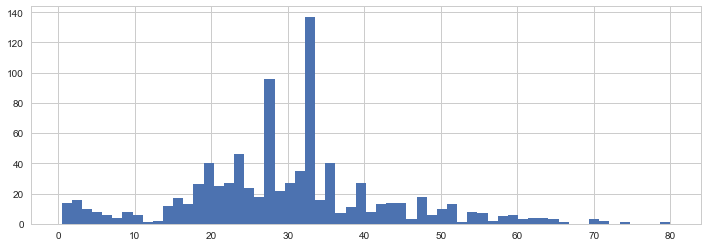

In [79]:
women_mean = train_data_cleared.loc[(train_data_cleared['Sex'] == 'female'), 'Age'].mean()
train_data_cleared.loc[(train_data_cleared['Age'].isnull()), 'Age'] = women_mean
#done, we can visualize it
fig, ax1 = plt.subplots(1, 1, figsize=(12,4))
train_data_cleared['Age'].hist(bins=60, ax=ax1)
#here is how age distribution looks like

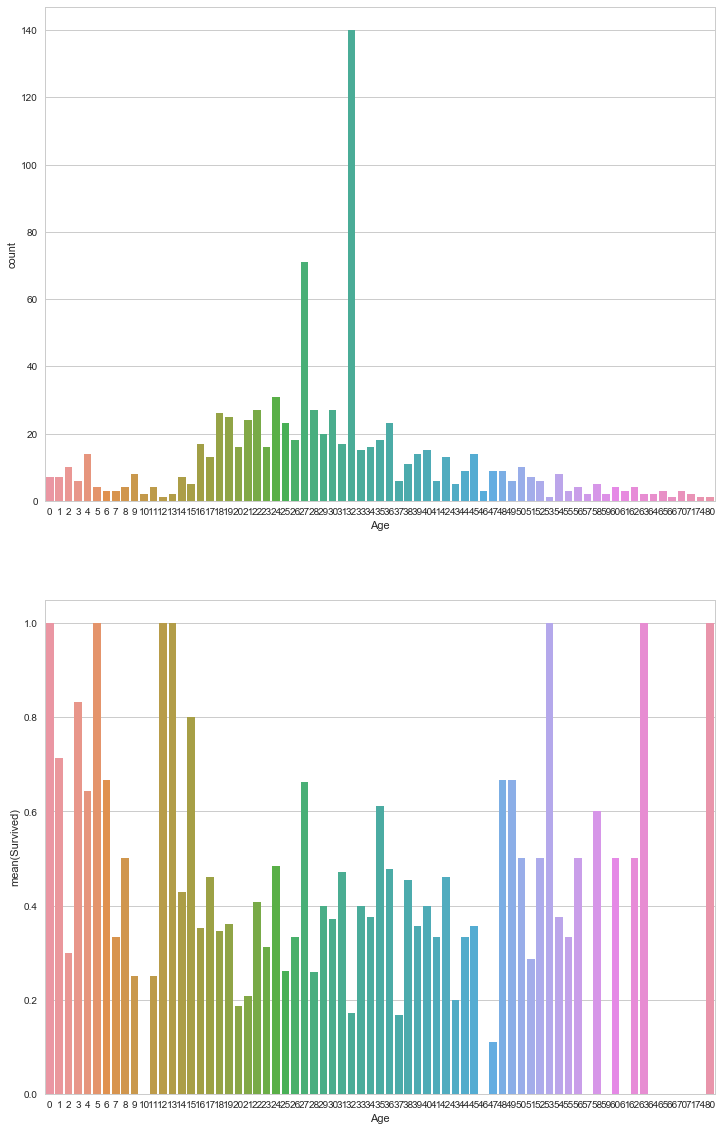

In [80]:
# And how survival rates look in different age groups?
# To get the better idea I will try to show both survival rate and counts, actually we can use
# bins with size of 1 year (to do it float->int conversion first will be done)
train_data_cleared['Age'] = train_data_cleared['Age'].astype(int)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 20))
sns.countplot(x=train_data_cleared['Age'], ax=ax1)
sns.barplot(x='Age', y='Survived', data=train_data_cleared[['Age', 'Survived']].groupby(
    'Age', as_index=False).mean())


In [81]:
# We can see that the left side of our age/mean(survival) plot, survival rates are quite good,
# and higher than average
# On the first look survival rates of old pesengers seemed good, but after a moment I saw that
# area with zero surival rate
# The reason is probably, that this group is rather small and 2-3 persons are sometimes all in bin 
# The children group on the other hand has greater quantity and may be worth to be treated specially
# in some wy (separate column? rather not, maybe better thing to do  is to distinquish it in 'Sex' 
# column as child)

In [82]:
def get_new_sex(data): 
    sex, age = data
    return 'child' if age <= 15 else sex

train_data_cleared.loc[:,'Sex'] = train_data_cleared[['Sex', 'Age']].apply(get_new_sex,
    axis=1)
# and yeah, child is not actually a sex, but I have no idea how to name it
# and after we have dealt with age we can get rid op Name column
train_data_cleared = train_data_cleared.drop('Name', 1)
train_data_cleared.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [83]:
# Last thing to deal with are columns SibSp and Parch - according to introduction they are respectively:
'''
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
'''
# I would like to first simplify this to one column - as family_members

'\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\n\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\n'

In [84]:
train_data_cleared['FamMembers'] = train_data_cleared['SibSp'] + train_data_cleared['Parch']
train_data_cleared = train_data_cleared.drop(['SibSp', 'Parch'], 1)

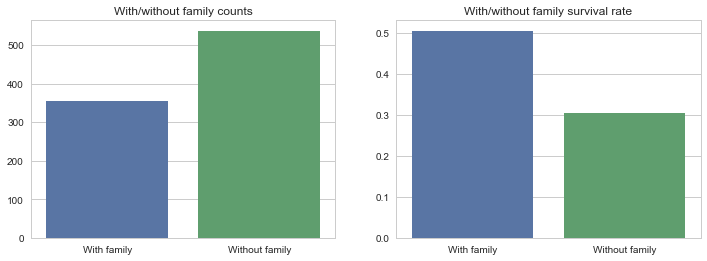

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
counts_names = ['With family', 'Without family']
with_family = train_data_cleared['FamMembers'] > 0
with_family_count = train_data_cleared[with_family].shape[0]
without_family_count = train_data_cleared.shape[0] - with_family_count

ax1.set_title('With/without family counts')
sns.barplot(x=counts_names, y=[with_family_count, without_family_count], ax=ax1)

with_survived_cnt = train_data_cleared[(with_family) & (train_data_cleared['Survived'] == 1)].shape[0]
without_survived_cnt = train_data_cleared[~(with_family) & (train_data_cleared['Survived'] == 1)].shape[0]

ax2.set_title('With/without family survival rate')
sns.barplot(x=counts_names, y=[with_survived_cnt / with_family_count,
                               without_survived_cnt / without_family_count], ax=ax2)



In [86]:
# We see that onboard were more people withot family - and that ones with family has greater survival
# rates. Does higher number of family members onboard positively/negatively affect survival rate?

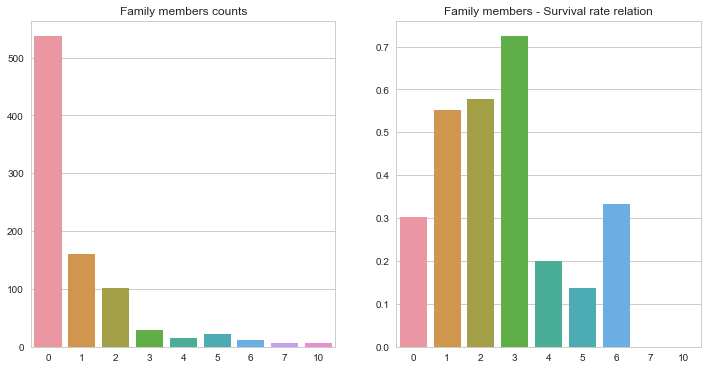

In [87]:
fam_mem_numbers = list(np.arange(0, max(train_data_cleared['FamMembers']) + 1, 1))

survival_rates = []
total_counts = []
to_delete = []
for num in fam_mem_numbers:
    total_count = train_data_cleared[train_data_cleared['FamMembers'] == num].shape[0]
    survived_count = train_data_cleared[(train_data_cleared['FamMembers'] == num) & 
                                       (train_data_cleared['Survived'] == 1)].shape[0]
    if total_count != 0:
        sur_rate = survived_count / total_count
        survival_rates.append(sur_rate)
        total_counts.append(total_count)
    else:
        to_delete.append(num)

for item in to_delete:
    fam_mem_numbers.remove(item)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Family members counts')
sns.barplot(x=fam_mem_numbers, y=total_counts, ax=ax1)
ax2.set_title('Family members - Survival rate relation')
sns.barplot(x=fam_mem_numbers, y=survival_rates, ax=ax2)

In [88]:
# We can see that to some extent the greater amount of family onboard - the greater survival chances
# But at some point (but this data is uncertain due to low amount of samples) chances drop down
# suddenly and are affected rather negatively
# I'm uncertain about leaving it the way it is and bringing it to 0/1 for not having/having
# family on board
# After all we will give it a shot as it is

In [89]:
# For now everything is analysed/visualized and prepared/cleaned - in case of train dataset, in 
# next few cells test dataset will be done the same way

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
test_data_cleared = test_data.drop(['Ticket', 'Cabin'], axis=1)

# Handling missing fare value - that passenger travel in class 3 and median of this class will be used
test_data_cleared.loc[test_data['Fare'].isnull(), 'Fare'] = test_data[
    test_data['Pclass'] == 3]['Fare'].median()

test_data_cleared['FamMembers'] = test_data_cleared['SibSp'] + test_data_cleared['Parch']
test_data_cleared.drop(['SibSp', 'Parch'], axis=1, inplace=True)

#Pandas docs says that it deals with missing values itself, so no not nul condition like earlier
master_mean = test_data_cleared[(test_data_cleared['Name'].str.contains('Master|master'))]['Age'].mean()
adult_men_mean = test_data_cleared[~(test_data_cleared['Name'].str.contains('Master|master'))][
    'Age'].mean()
women_mean = test_data_cleared[test_data_cleared['Sex'] == 'female']['Age'].mean()

test_data_cleared.loc[(test_data_cleared['Sex'] == 'female') & (test_data_cleared['Age'].isnull()),
                       'Age'] = women_mean
test_data_cleared.loc[test_data_cleared['Name'].str.contains('Master|master') & (
    test_data_cleared['Age'].isnull()), 'Age'] = master_mean
test_data_cleared.loc[test_data_cleared['Age'].isnull(), 'Age'] = adult_men_mean
test_data_cleared['Age'] = test_data_cleared['Age'].astype(int)

test_data_cleared.loc[test_data_cleared['Age'] <= 15, 'Sex'] = 'child'

test_data_cleared.drop(['Name', 'PassengerId'], axis=1, inplace=True)
test_data_cleared.head(10)
test_data_cleared.info()
train_data_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass        418 non-null int64
Sex           418 non-null object
Age           418 non-null int32
Fare          418 non-null float64
Embarked      418 non-null object
FamMembers    418 non-null int64
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 18.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null int32
Fare          891 non-null float64
Embarked      889 non-null object
FamMembers    891 non-null int64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.3+ KB


In [92]:
# Well, looks like it is done, it actually went faster and better (code more clear and readable than
# the first one)
# Now it is time to get data ready for ml

In [93]:
# Well I unsuccesfully tried to use models at this moment it but there is one more thing - string values
# are needed to get rid off
# Scikit-learn internaly works in floats, and try to convert to them every data, what won't
# be possible in case of values like 'male' or 'female'
# First idea, just encoding it in form of dict like [male:1, female:2] won't work either,
# scikit treat like contious values, not categorical and that will cause the problems
# Solution found i one of k encoding - so for each value we will have binary with 0 or 1
# On the other hand it will cause featur number growth so it is worth to think again
# and potentially get rid off som clases like for example 'male' from 'Sex'

In [94]:
# After some reaserch we (according to: i.e. https://en.wikipedia.org/wiki/Dummy_variable_(statistics))
# We can safely remove one value (column, after transformation) (preferably most frequent),
# it will be treated then as base category and other ones will be tested against it
# So in our case we need to create columns as follows:
# *for passenger class: 1 and 2 (3rd class will be discarded one)
# *for 'Sex': child and female (male class will be discarded one)
# *for embarkation port: Q and C (Southampton will be discarded one)

In [95]:
#Passenger class
pclass_train_dummies = pd.get_dummies(train_data_cleared['Pclass'])
pclass_test_dummies = pd.get_dummies(test_data_cleared['Pclass'])

pclass_train_dummies.columns = ['Class 1', 'Class 2', 'Class 3']
pclass_test_dummies.columns = ['Class 1', 'Class 2', 'Class 3']

pclass_train_dummies.drop('Class 3', inplace=1, axis=1)
pclass_test_dummies.drop('Class 3', inplace=1, axis=1)

train_data_cleared.drop('Pclass', axis=1, inplace=1)
test_data_cleared.drop('Pclass', axis=1, inplace=1)

train_data_cleared = train_data_cleared.join(pclass_train_dummies)
test_data_cleared = test_data_cleared.join(pclass_test_dummies)
#note: for some reason I get here key error sometimes (using notebook on Kaggle), after
# running all cells once more everything works well

In [96]:
#Embarkation port
embarkation_train_dummies = pd.get_dummies(train_data_cleared['Embarked'])
embarkation_test_dummies = pd.get_dummies(test_data_cleared['Embarked'])

embarkation_train_dummies.columns = ['C', 'Q', 'S']
embarkation_test_dummies.columns = ['C', 'Q', 'S']

embarkation_train_dummies.drop('S', inplace=1, axis=1)
embarkation_test_dummies.drop('S', inplace=1, axis=1)

train_data_cleared.drop('Embarked', axis=1, inplace=1)
test_data_cleared.drop('Embarked', axis=1, inplace=1)

train_data_cleared = train_data_cleared.join(embarkation_train_dummies)
test_data_cleared = test_data_cleared.join(embarkation_test_dummies)

In [97]:
# 'Sex'  (in apostrophes because of that column naming when it actually contains child either ^^)
sex_train_dummies = pd.get_dummies(train_data_cleared['Sex'])
sex_test_dummies = pd.get_dummies(test_data_cleared['Sex'])

# sex_train_dummies.columns = [''] well earlier it was easy but how are these values in alphabetical
# order or maybe some different one?
# print(train_data_cleared.head(10))
# print(sex_train_dummies.head(10))
# after check: yes it is alphabetical

sex_train_dummies.columns = ['child', 'female', 'male']
sex_test_dummies.columns = ['child', 'female', 'male']

sex_train_dummies.drop('male', axis=1, inplace=1)
sex_test_dummies.drop('male', axis=1, inplace=1)

train_data_cleared.drop('Sex', axis=1, inplace=1)
test_data_cleared.drop('Sex', axis=1, inplace=1)

train_data_cleared = train_data_cleared.join(sex_train_dummies)
test_data_cleared = test_data_cleared.join(sex_test_dummies)

In [98]:
# And quick look to check if everything was done ok:
print(train_data_cleared.head(10))
print(test_data_cleared.head(10))

   Survived  Age     Fare  FamMembers  Class 1  Class 2  C  Q  child  female
0         0   22   7.2500           1        0        0  0  0      0       0
1         1   38  71.2833           1        1        0  1  0      0       1
2         1   26   7.9250           0        0        0  0  0      0       1
3         1   35  53.1000           1        1        0  0  0      0       1
4         0   35   8.0500           0        0        0  0  0      0       0
5         0   32   8.4583           0        0        0  0  1      0       0
6         0   54  51.8625           0        1        0  0  0      0       0
7         0    2  21.0750           4        0        0  0  0      1       0
8         1   27  11.1333           2        0        0  0  0      0       1
9         1   14  30.0708           1        0        1  1  0      1       0
   Age     Fare  FamMembers  Class 1  Class 2  C  Q  child  female
0   34   7.8292           0        0        0  0  1      0       0
1   47   7.0000    

In [99]:
# Preparing finally done
# Now I will split train dataset into train/test set and test it against some models,
# depending on results I will pick the best, then train it again with all my data and use
# it on final test set from test.csv
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_data_cleared.drop('Survived', axis=1), 
                                                   train_data_cleared['Survived'], test_size=0.17,
                                                   random_state=0)

In [100]:
# Like i mentioned I'm a newbie so I will test as many models as posible just out of curiosity
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Logisitic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
logistic_regression.score(X_test, Y_test)

0.82894736842105265

In [102]:
# Wohoo, something works :D
# Whats more, it is actually better than a monkey (which would pick at random with 50% chances) :D
# But lets test out other imported models

In [103]:
# SVC
svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.71710526315789469

In [104]:
# linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
linear_svc.score(X_test, Y_test)

0.73026315789473684

In [105]:
# Well, Support Vector Classification gives worse results, but let's move on

In [106]:
# Gaussian Naive Bayes
gaussian_NB = GaussianNB()
gaussian_NB.fit(X_train, Y_train)
gaussian_NB.score(X_test, Y_test)

0.82236842105263153

In [107]:
# K nearest neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
knn_classifier.score(X_test, Y_test)

0.73684210526315785

In [108]:
# Deision Tree
dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train, Y_train)
dtree_classifier.score(X_test, Y_test)

0.78289473684210531

In [109]:
# And last but not least, classifier that will probably have the best output
# Random Forest
rand_forest_classifier = RandomForestClassifier(n_estimators=200)
rand_forest_classifier.fit(X_train, Y_train)
rand_forest_classifier.score(X_test, Y_test)

0.84868421052631582

In [110]:
# Well, around 84-85, which is not so bad I think
# (and definitely better that mentioned earlier monkey :D)

In [111]:
# Time for final results

In [112]:
rand_forest_classifier = RandomForestClassifier(n_estimators=200)
rand_forest_classifier.fit(train_data_cleared.drop('Survived', axis=1), train_data_cleared['Survived'])
results = rand_forest_classifier.predict(test_data_cleared)
results

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [113]:
# description says submission should be in PassngerId, Predicted Survival output, so ordinary join
# of pandas df will do the work
results_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': results})
#print(test_data_cleared.head(50))
#print(results_df.head(50))
results_df.to_csv('titanic_results.csv', index=False)

In [114]:
# test
rand_forest_classifier = RandomForestClassifier(n_estimators=200, max_depth=10)
rand_forest_classifier.fit(X_train, Y_train)
rand_forest_classifier.score(X_test, Y_test)

0.84868421052631582

Feature ranking:
1. feature 8 (0.268539)
2. feature 1 (0.237931)
3. feature 0 (0.225362)
4. feature 2 (0.098591)
5. feature 3 (0.051620)
6. feature 7 (0.040358)
7. feature 4 (0.040145)
8. feature 5 (0.021342)
9. feature 6 (0.016112)


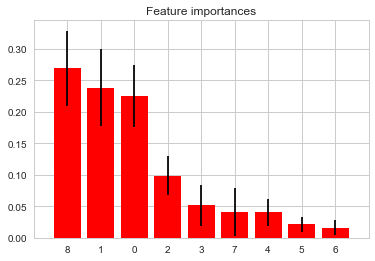

In [115]:
# We have model and predictions already, now out of curiosity a little check of features importance
importances = rand_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()